# Starting with dowhy for Causality inference analysis


In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
# from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


In [9]:
CSV_PATH = "../data/Feature_selection_with_correlation.csv"

In [10]:
def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [11]:
df = read_proccessed_data(CSV_PATH)

file read as csv


In [12]:
df.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,NaN
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902,NaN
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758,NaN
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300,NaN
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,NaN


In [13]:
from dowhy import CausalModel
import dowhy.datasets as ds

In [14]:
d = ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

In [18]:
d["dot_graph"] = 'digraph { U[label="Unobserved Confounders"];U->Diagnosis;area_mean->Diagnosis;concavity_mean->Diagnosis;area_se->Diagnosis;symmetry_worst->Diagnosis;concavity_worst->Diagnosis;symmetry_se->Diagnosis;concavity_se->Diagnosis;smoothness_se->Diagnosis;fractal_dimension_mean->Diagnosis;smoothness_mean->Diagnosis;symmetry_se->Diagnosis;fractal_dimension_se->Diagnosis;smoothness_worst->Diagnosis;fractal_dimension_worst->Diagnosis;}'

In [19]:
model = CausalModel(
    data = df,
    treatment = ["Diagnosis"],
    outcome = "Diagnosis",
    graph = d["dot_graph"]
)

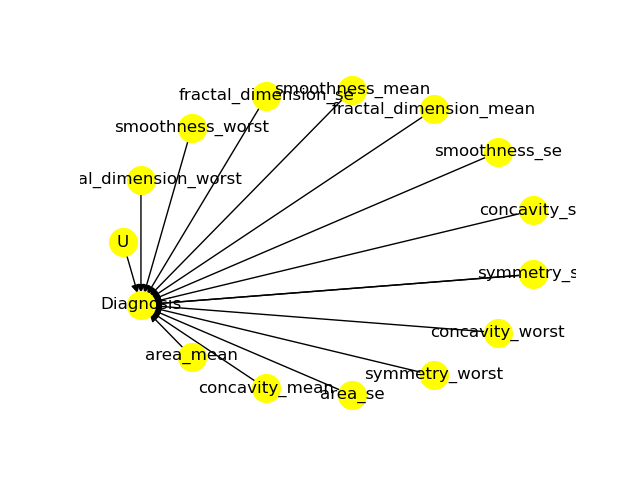

In [20]:
model.view_model(layout = "dot_graph")
from IPython.display import Image, display
display(Image(filename = "causal_model.png"))

In [28]:
d["dot_graph"] = 'digraph { U[label="Unobserved Confounders"];U->Diagnosis;area_mean->Diagnosis;concavity_mean->Diagnosis;area_se->Diagnosis;symmetry_worst->Diagnosis;concavity_worst->Diagnosis;}'

In [29]:
model = CausalModel(
    data = df,
    treatment = ["Diagnosis"],
    outcome = "Diagnosis",
    graph = d["dot_graph"]
)

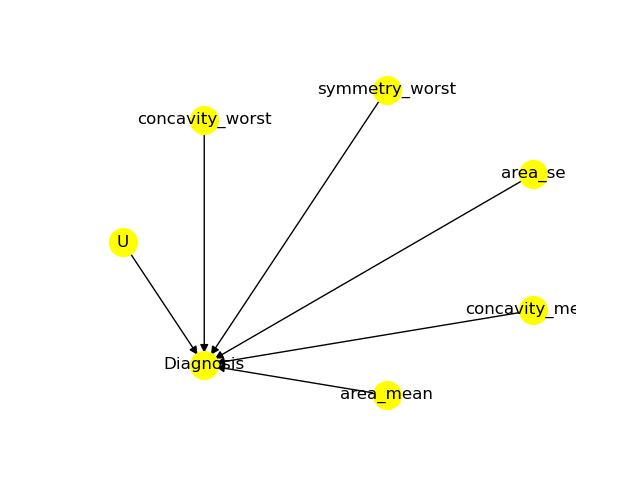

In [30]:
model.view_model(layout = "dot_graph")
from IPython.display import Image, display
display(Image(filename = "causal_model.png"))

In [32]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_common_causes',
 '_data',
 '_effect_modifiers',
 '_estimand_type',
 '_graph',
 '_instruments',
 '_missing_nodes_as_confounders',
 '_other_variables',
 '_outcome',
 '_proceed_when_unidentifiable',
 '_treatment',
 'do',
 'estimate_effect',
 'identify_effect',
 'interpret',
 'logger',
 'refute_estimate',
 'summary',
 'view_model']

In [35]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                              
────────────(Expectation(Diagnosis))
d[Diagnosis]                        
Estimand assumption 1, Unconfoundedness: If U→{Diagnosis} and U→Diagnosis then P(Diagnosis|Diagnosis,,U) = P(Diagnosis|Diagnosis,)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Diagnosis, [concavity_mean, area_se, area_mean, concavi
ty_worst, U, symmetry_worst])*Derivative([Diagnosis], [concavity_mean, area_se
, area_mean, concavity_worst, U, symmetry_worst])**(-1))
Estimand assumption 1, As-if-random: If U→→Diagnosis then ¬(U →→{concavity_mean,area_se,area_mean,concavity_worst,U,symmetry_worst})
Estimand assumption 2, Exclusion: If we remove {concavity_mean,area_se,area_mean,concavity_worst,U,symmetry_worst}→{Diagnosis}, then ¬({concavity_mean,area_se,area_mean,concavity_worst,U,symmetry_worst}→Diagnosis)

### Estimand : 3
Estimand name: frontdoor


In [36]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

KeyError: "None of [Index(['Diagnosis'], dtype='object')] are in the [columns]"

In [48]:
identified_estimand = model.identify_effect()
print(identified_estimand)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                  
─────(Expectation(y))
d[v₀]                
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,,U) = P(y|v0,)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [31]:
estimate = model.estimate_effect(identified_estimand,method_name = "backdoor.linear_regression")

NameError: name 'identified_estimand' is not defined

In [51]:
d["treatment_name"],

(['v0'],)

In [52]:
d["outcome_name"],

('y',)

In [53]:
d["gml_graph"]

'graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

In [54]:
ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

{'df':             W0        W1        W2        W3        W4     v0         y
 0     0.592719  1.147668 -1.428245 -0.779740  0.480400  False -0.651857
 1     0.563875 -0.268635  0.194788 -0.201259  0.953345   True  4.401147
 2     1.425879 -0.276493  0.109058 -3.281424  0.112673  False -6.853664
 3    -0.747280 -1.051617  1.031021 -0.409387  0.839074  False -1.748882
 4    -1.008524  0.651541 -0.867160 -2.515052  2.084695  False -4.485655
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -1.398303  3.122374 -0.949994 -1.460479  0.346022  False  1.272263
 9996 -0.319507  2.834405  1.555401 -1.092235  0.100099  False  3.282058
 9997  2.634543  1.003346  0.285017  0.757903  0.806730   True  8.458195
 9998  1.736977  2.351938  0.678294 -0.160941  2.011505   True  9.028913
 9999 -0.708639 -2.747071  1.057305  0.133040  2.271360   True  1.793347
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0', 'W1', 'W2

In [55]:
d["common_causes_names"] = ['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']

In [100]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [101]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
